<a href="https://colab.research.google.com/github/MAKKAJIYASHASREE/AI/blob/main/19K41A05G2_ASSIGNMENT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import math as mt
import random
import pandas as pd
import xlrd

In [3]:
book=xlrd.open_workbook(filename='/content/drive/MyDrive/Pds/ slr09.xls')
data=pd.read_excel(book)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [4]:
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [5]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [6]:
sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in A column from Z-scores method: ", sample_outliers_X)
print("Outliers in B column from Z-scores method: ", sample_outliers_Y)

Outliers in A column from Z-scores method:  []
Outliers in B column from Z-scores method:  []


In [7]:
from scipy.stats import zscore
zX = np.abs(zscore(data['X']))
zY = np.abs(zscore(data['Y']))
data['ZscoreX'] = zX
data['ZscoreY'] = zY
outliers_X=len(data[data['ZscoreX']>3])
outliers_Y=len(data[data['ZscoreY']>3])
data_z = data[data['ZscoreX']<3]
data=data_z.drop(['ZscoreX', 'ZscoreY'], axis=1)
data

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [8]:
print(data.isnull().sum())
m1=data['X'].mean()
m2=data['Y'].mean()
data['X'].fillna(value=m1, inplace=True)
data['Y'].fillna(value=m2, inplace=True)
data

X    0
Y    0
dtype: int64


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [9]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min() 
y_max = data['Y'].max()
print(x_min, x_max, y_min, y_max) 

6.7 8.8 35 262


In [10]:
from sklearn.preprocessing import MinMaxScaler
X1 = np.array(data['X']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X1)
X_scaled = scaler.transform(X1)
data['X'] = X_scaled.reshape(1,-1)[0]

In [11]:
Y1 = np.array(data['Y']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(Y1)
Y_scaled = scaler.transform(Y1)
data['Y'] = Y_scaled.reshape(1,-1)[0]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.10, random_state = 10)

In [13]:
m1=random.uniform(-10,10)
m2=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.01
max_iter=100000

In [14]:
def gradient(m1,m2,c,x,y):
  m1_deriv=-1*(y-m1*x*x-m2*x-c)*x*x
  m2_deriv=-1*(y-m1*x*x-m2*x-c)*x
  c_deriv=-1*(y-m1*x*x-m2*x-c)
  return m1_deriv,m2_deriv,c_deriv

In [15]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m1,del_m2,del_c=gradient(m1, m2, c, x_train.iloc[sample], y_train.iloc[sample])
    m1=m1-eta*del_m1
    m2=m2-eta*del_m2
    c=c-eta*del_c
print('model parameter m1, m2 and c',m1,m2,c)

model parameter m1, m2 and c -0.3599254160729941 -0.040058600329004275 0.5822105432793725


In [16]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m1 * i*i)+(m2 * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

In [17]:
y_pred_test = []
for i in x_test:
  y_p_te = (m1 * i*i)+(m2 * i) + c
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

In [18]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 0.22210547873957606
Mean square error 0.04933084368613628
Mean absolute error 0.18686997033694042


In [20]:
#Testing Accuracies
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse)
mse = mt.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', mse)  
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Mean square error 0.06904589162818806
Root mean square error 0.26276584943288966
Mean absolute error 0.248291187058298


In [21]:
X=float(input('Enter PH value of well water'))
print('X=',X)

x_nor = (X - x_min)/(x_max - x_min)
y_nor = m1*x_nor*x_nor + m2*x_nor + c

Y = y_nor*(y_max - y_min) + y_min 
print('Bi-carbonates = ',Y)

Enter PH value of well water7.5
X= 7.5
Bi-carbonates =  151.84054337689975


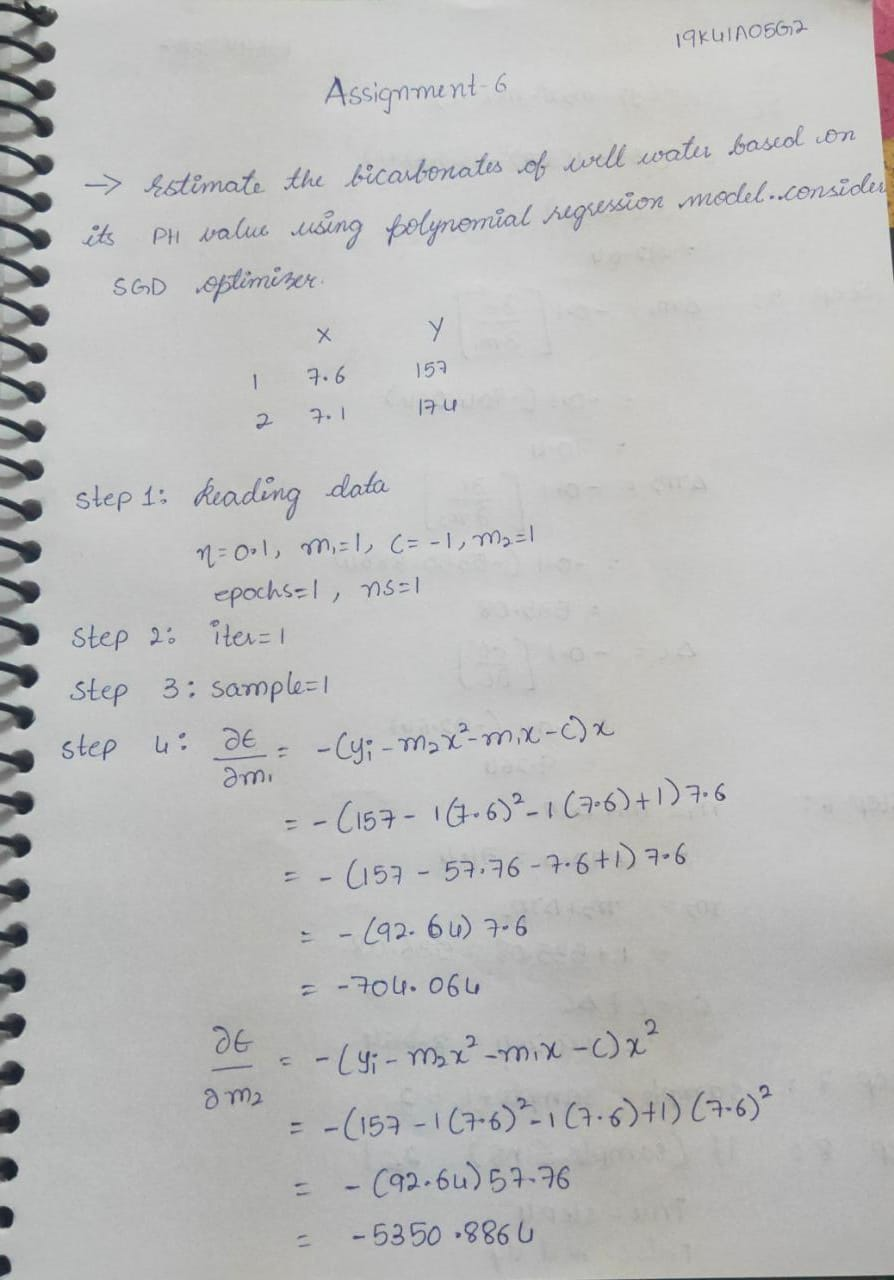

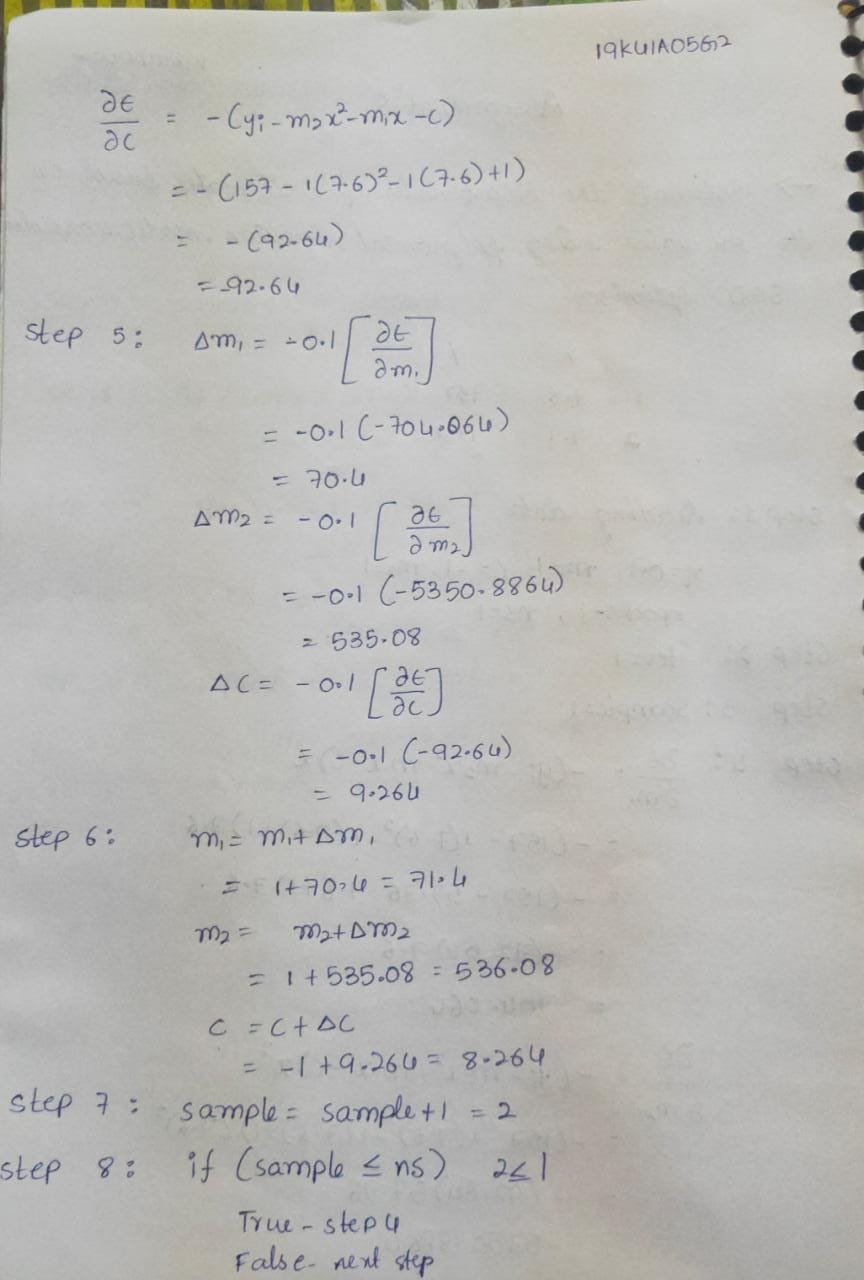

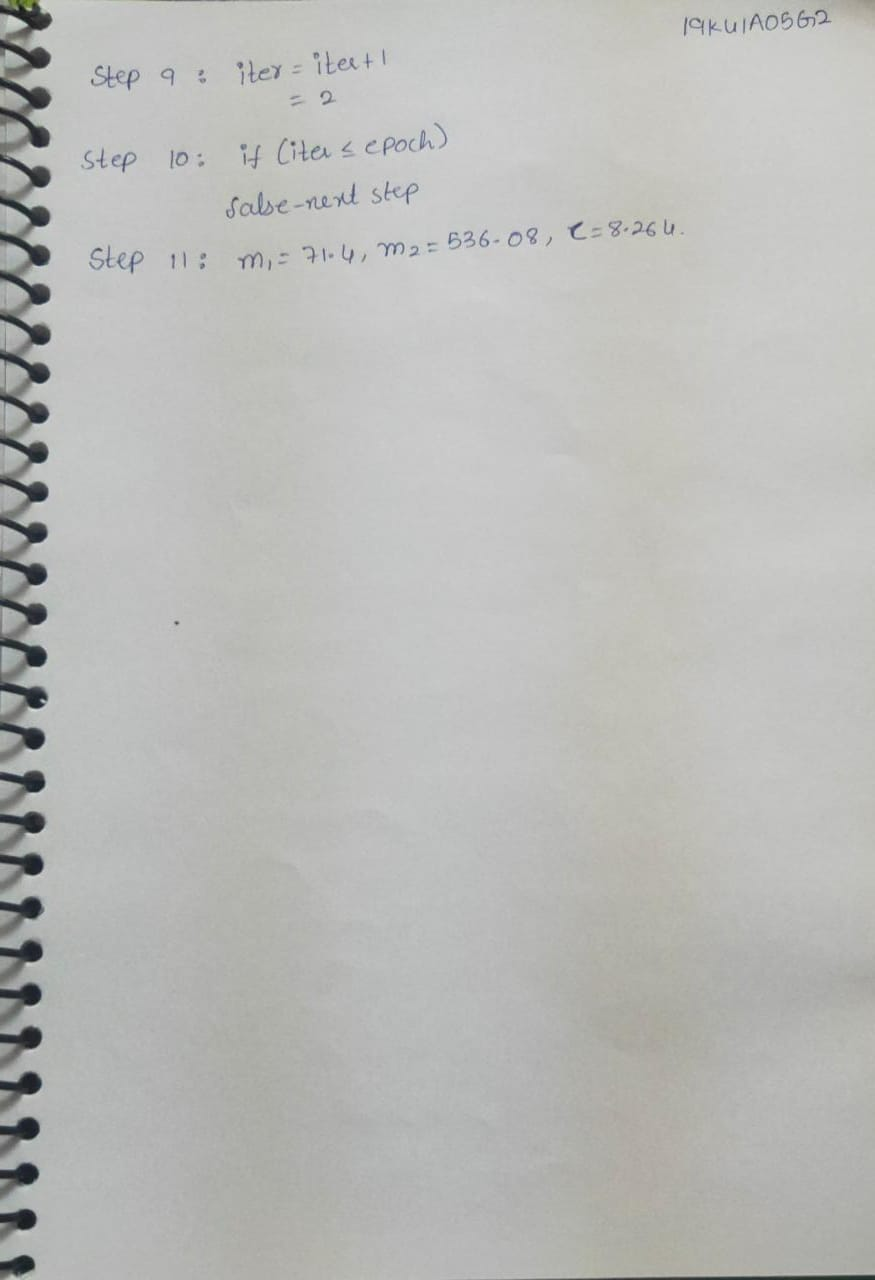